In [ ]:
# Group Member Name: Sara Jerin Prithila
# Group Member Name: Tamim Al Ahasan
# Fake News Detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/study /CSE422 lab/news dataset ml.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Column1  72134 non-null  int64 
 1   title    71576 non-null  object
 2   text     72007 non-null  object
 3   label    72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
df.head()

,Column1,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
print(f'Shape: {df.shape}')

Shape: (72134, 4)


In [ ]:
#Feature Selection
df = df.drop(columns='title', axis=1)

In [ ]:
#removing null values
df.isnull().sum()

Column1      0
text       127
label        0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,Column1,text,label
0,0,No comment is expected from Barack Obama Membe...,1
1,1,Did they post their votes for Hillary already?,1
2,2,"Now, most of the demonstrators gathered last ...",1
3,3,A dozen politically active pastors came here f...,0
4,4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
df.text.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
72129    False
72130    False
72131    False
72132    False
72133    False
Name: text, Length: 72007, dtype: bool

In [ ]:
#removing duplicates row
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)

In [ ]:
df

,Column1,text,label
0,0,No comment is expected from Barack Obama Membe...,1
1,1,Did they post their votes for Hillary already?,1
2,2,"Now, most of the demonstrators gathered last ...",1
3,3,A dozen politically active pastors came here f...,0
4,4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...
72002,72129,WASHINGTON (Reuters) - Hackers believed to be ...,0
72003,72130,"You know, because in fantasyland Republicans n...",1
72004,72131,Migrants Refuse To Leave Train At Refugee Camp...,0
72005,72132,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [ ]:
df.isnull().sum()

Column1    0
text       0
label      0
dtype: int64

In [ ]:
realNumber = (df["label"]==1).sum()
fakeNumber = (df["label"]==0).sum()
print(f'Number of real news {realNumber}\nNumber of fake news {fakeNumber}')

Number of real news 37021
Number of fake news 34986


Data Visualization:

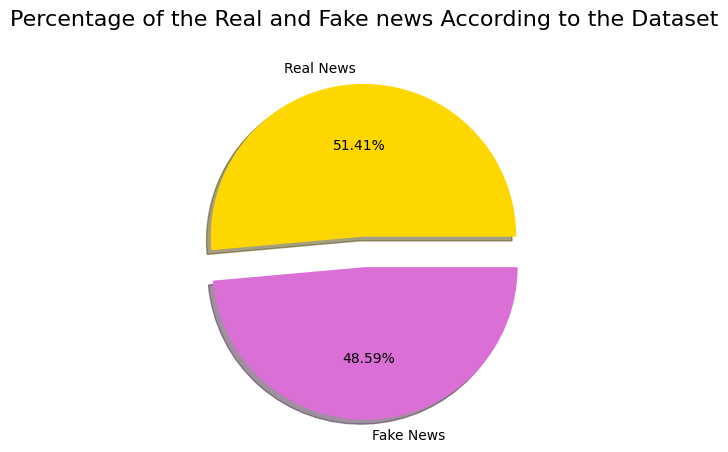

In [ ]:
y = np.array([realNumber, fakeNumber])
mylabels = ["Real News", "Fake News"]
myexplode = [0.2, 0]
plt.pie(y, labels = mylabels, explode = myexplode, autopct='%1.2f%%', shadow = True, colors=['gold', 'orchid', ])
plt.title(label="Percentage of the Real and Fake news According to the Dataset", fontdict={"fontsize":16},pad=30)
plt.axis('equal')
plt.show()

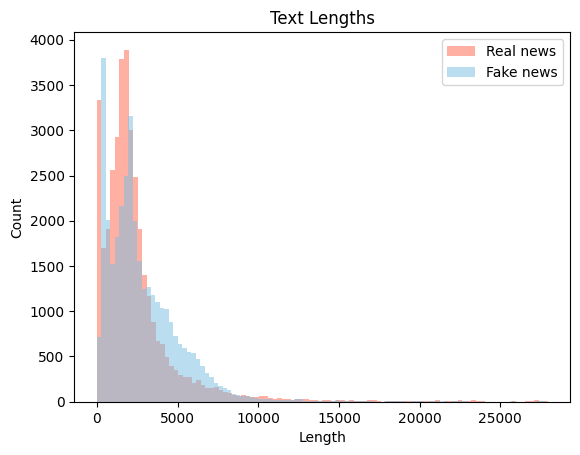

In [ ]:
real_df = df.loc[df['label']==1] #real_df contains real news
fake_df = df.loc[df['label']==0] #fake_df contains real news
real_rpl = real_df['text'].str.replace(" ", "")
fake_rpl = fake_df['text'].str.replace(" ", "")
real_lengths = real_rpl.apply(len)
fake_lengths = fake_rpl.apply(len)
plt.hist(real_lengths, bins=100, alpha=0.5, label='Real news', color="tomato")
plt.hist(fake_lengths, bins=100, alpha=0.5, label='Fake news', color="#77BFE2")
plt.title('Text Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

Data Visualization: Most Frequently Used Words

In [ ]:
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords.update(["a", "told", "last", "an", "the","states", "t","first", "us", "new", "even","and", "said", "s", "—", "but", "or", "one","because", "trump’s","as", "until", "while", "of", "at", "by", "for", "with","white", "many", "former", "about", "against", "between", "into", "through", "during", "before","said.", "mr.", "”", "people", "-", "two", "after", "above", "(reuters)", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "can", "will", "just"])

In [ ]:
fake_df = df.loc[df['label']==0]
text = ' '.join(text for text in fake_df['text'])
fake_text = text.lower()
ft = [word for word in fake_text.split() if word not in stopwords]
countedWords = collections.Counter(ft)
fakedata=[]
fakewords = []
FakewordAndCount = {}
for letter, count in countedWords.most_common(9):
    FakewordAndCount[letter] = count

for i,j in FakewordAndCount.items():
        fakedata.append([i,j])
        fakewords.append(i)


In [ ]:
real_df = df.loc[df['label']==1]
text = ' '.join(text for text in real_df['text'])
rtext = text.lower()

fdword = set(fakewords)
realdata=[]
rt = [word for word in rtext.split() if word in fdword]
countedWords = collections.Counter(rt)

RealwordAndCount = {}
for letter, count in countedWords.most_common(9):
    RealwordAndCount[letter] = count
for i,j in RealwordAndCount.items():
        realdata.append([i,j])

In [ ]:
rdc = pd.DataFrame(realdata, columns=['Word', 'realCount'])
rdc

,Word,realCount
0,trump,83600
1,clinton,33642
2,president,29870
3,state,18779
4,u.s.,15069
5,government,14654
6,united,14100
7,house,11888
8,republican,11623


In [ ]:
fdc = pd.DataFrame(fakedata, columns=['Word', 'fakeCount'])
fdc

,Word,fakeCount
0,trump,69398
1,u.s.,41213
2,president,40797
3,state,28052
4,united,27225
5,republican,23965
6,house,23652
7,government,23608
8,clinton,17939


In [ ]:
df3 = pd.concat([fdc, rdc])

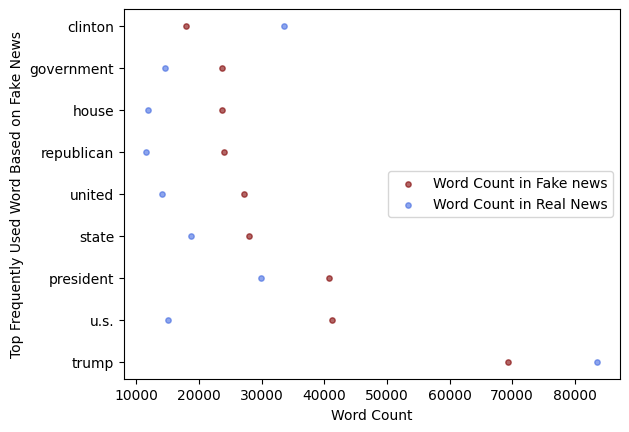

In [ ]:
plt.xlabel("Word Count")
plt.ylabel("Top Frequently Used Word Based on Fake News")
plt.scatter(df3["fakeCount"],df3["Word"],c="maroon", s=15, alpha = 0.6)
plt.scatter(df3["realCount"],df3["Word"],c="royalblue", s=15, alpha = 0.6)
plt.legend(["Word Count in Fake news", "Word Count in Real News"], facecolor='white', loc='right')

Data Visualization: Number of Punctuation Used in News Articles

In [ ]:
import re
listR=[]
def count_puncts_Real(x):
  new_str, countR = re.subn(r'\W', '', x)
  listR.append(countR)
punR = real_df['text'].apply(count_puncts_Real)

listF = []
def count_puncts_Fake(x):
  new_str, countF = re.subn(r'\W', '', x)
  listF.append(countF)
punF = fake_df['text'].apply(count_puncts_Fake)

In [ ]:
rpc = pd.DataFrame(listR, columns=['realPCount'])
rpc = rpc.reset_index()
rpc.columns = ['SL. No.', 'realPCount']
rpc

fpc = pd.DataFrame(listF, columns=['fakePCount'])
fpc = fpc.reset_index()
fpc.columns = ['SL. No.', 'fakePCount']

In [ ]:
fpc , rpc

(       SL. No.  fakePCount
 0            0        1559
 1            1         450
 2            2         498
 3            3         605
 4            4         300
 ...        ...         ...
 34981    34981        1597
 34982    34982        2649
 34983    34983         879
 34984    34984         572
 34985    34985         666
 
 [34986 rows x 2 columns],
        SL. No.  realPCount
 0            0        1122
 1            1           8
 2            2          39
 3            3         379
 4            4         295
 ...        ...         ...
 37016    37016           1
 37017    37017         237
 37018    37018         968
 37019    37019         662
 37020    37020         543
 
 [37021 rows x 2 columns])

In [ ]:
rpcSample = rpc.sample(n = 2000)
fpcSample = fpc.sample(n = 2000)

In [ ]:
df4 = pd.concat([rpcSample, fpcSample])

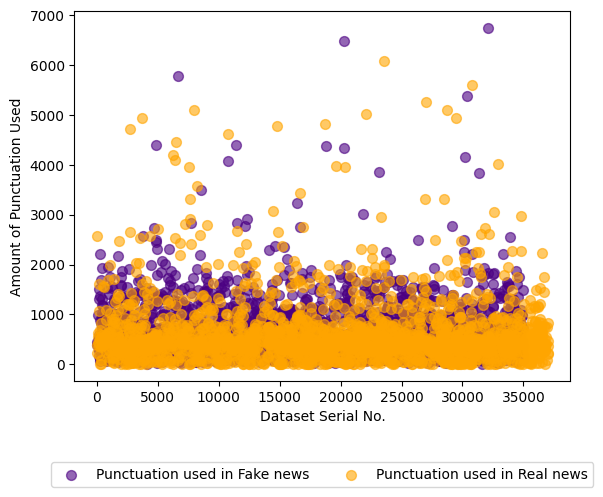

In [ ]:
plt.xlabel("Dataset Serial No.")
plt.ylabel("Amount of Punctuation Used")
plt.scatter(df4["SL. No."],df4["fakePCount"],c="indigo", s=50, alpha=0.6)
plt.scatter(df4["SL. No."],df4["realPCount"],c="orange", s=50 , alpha=0.6)
plt.legend(["Punctuation used in Fake news", "Punctuation used in Real news"], facecolor='white',loc='upper center',bbox_to_anchor=(0.5, -.2), ncol=5)

In [ ]:
text_df = df.drop(columns='label', axis=1)
label_df = df['label']
print(text_df)
print(label_df)

       Column1                                               text
0            0  No comment is expected from Barack Obama Membe...
1            1     Did they post their votes for Hillary already?
2            2   Now, most of the demonstrators gathered last ...
3            3  A dozen politically active pastors came here f...
4            4  The RS-28 Sarmat missile, dubbed Satan 2, will...
...        ...                                                ...
72002    72129  WASHINGTON (Reuters) - Hackers believed to be ...
72003    72130  You know, because in fantasyland Republicans n...
72004    72131  Migrants Refuse To Leave Train At Refugee Camp...
72005    72132  MEXICO CITY (Reuters) - Donald Trump’s combati...
72006    72133  Goldman Sachs Endorses Hillary Clinton For Pre...

[72007 rows x 2 columns]
0        1
1        1
2        1
3        0
4        1
        ..
72002    0
72003    1
72004    0
72005    0
72006    1
Name: label, Length: 72007, dtype: int64


# Data preprocessing


In [ ]:
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Pstemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
Stopword = nltk.corpus.stopwords.words('english')

In [ ]:
def eliminateUrl(alteredText):
    return re.sub(r'http\S+', ' ', alteredText)

def eliminatePunctuation(alteredText):
  return re.sub(r'[^\w\s\d]', '', alteredText)

def eliminateDigit(alteredText):
  return re.sub('[^a-z]',' ', alteredText)

def tokenize(alteredText):
  tokenizer = RegexpTokenizer('[a-z]\w+')
  return tokenizer.tokenize(alteredText)

def stem(alteredText):
  alteredText = [lemmatizer.lemmatize(i) for i in alteredText if i not in Stopword]
  alteredText = ' '.join(alteredText)
  return alteredText

def wordPreprocessing(Text):
    alteredText = Text.lower()
    alteredText = eliminateUrl(alteredText)
    alteredText = eliminatePunctuation(alteredText)
    alteredText = eliminateDigit(alteredText)
    alteredText = tokenize(alteredText)
    alteredText = stem(alteredText)
    return alteredText

In [ ]:
df['text'] = df['text'].apply(wordPreprocessing)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(df['text'])

0        comment expected barack obama member fyf fukyo...
1                                post vote hillary already
2        demonstrator gathered last night exercising co...
3        dozen politically active pastor came private d...
4        r sarmat missile dubbed satan replace s fly mi...
                               ...                        
72002    washington reuters hacker believed working rus...
72003    know fantasyland republican never questioned c...
72004    migrant refuse leave train refugee camp hungar...
72005    mexico city reuters donald trump combative sty...
72006    goldman sachs endorses hillary clinton preside...
Name: text, Length: 72007, dtype: object


In [ ]:
textList = df['text'].values
labelList = df['label'].values

In [ ]:
print(textList)
print(labelList)

['comment expected barack obama member fyf fukyoflag blacklivesmatter movement called lynching hanging white people cop encouraged others radio show tuesday night turn tide kill white people cop send message killing black people americaone fyoflag organizer called sunshine radio blog show hosted texas called sunshine fing opinion radio show snapshot fyf lolatwhitefear twitter page pm show urging supporter call fyf tonight continue dismantle illusion white snapshot twitter radio call invite fyf radio show aired pm eastern standard timeduring show caller clearly call lynching killing white peoplea minute clip radio show heard provided breitbart texas someone would like referred hannibal already received death threat result interrupting fyf conference callsan unidentified black man said mother fkers start fing like u bunch niers takin one u roll said cause already roll gang anyway six seven black mother fckers see white person lynch as let turn table conspired cop started losing people st

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
vectorizer.fit(textList)
textList = vectorizer.transform(textList)

In [ ]:
print(textList)

  (0, 304124)	0.028964003566537024
  (0, 303928)	0.021243190278511858
  (0, 303102)	0.04574825089167845
  (0, 300166)	0.01961357311428925
  (0, 297947)	0.04506178897865622
  (0, 297027)	0.02306463830032044
  (0, 296346)	0.13079603967456224
  (0, 295951)	0.025201589474950846
  (0, 294884)	0.014368537051596806
  (0, 294098)	0.022864477512881936
  (0, 293467)	0.013560662948916535
  (0, 293083)	0.05726675025223968
  (0, 292214)	0.03479330908838996
  (0, 291853)	0.056030643503593054
  (0, 288520)	0.01801804328854459
  (0, 288027)	0.051422778431706756
  (0, 285708)	0.0429502522625672
  (0, 284758)	0.03038785215689655
  (0, 284538)	0.029547991143138785
  (0, 284480)	0.06428345152591175
  (0, 282758)	0.03420188851450176
  (0, 282736)	0.036663420095843766
  (0, 281491)	0.04152344558886552
  (0, 279820)	0.02507263559088798
  (0, 279470)	0.05319791845455051
  :	:
  (72006, 59075)	0.03675214500540568
  (72006, 58053)	0.027353840341600745
  (72006, 57698)	0.018244872827898995
  (72006, 57352)	0.033

# Training Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(textList ,labelList, test_size=0.2, random_state=100)

# Logistic Regression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)          ######################

LogisticRegression()

In [ ]:
X_train_prediction_lr = LR.predict(X_train)
training_data_accuracy_lr = accuracy_score(y_train, X_train_prediction_lr)
print('Accuracy score of the training data : ', training_data_accuracy_lr)

Accuracy score of the training data :  0.9653328704105546


In [ ]:
X_test_prediction_lr = LR.predict(X_test)
test_data_accuracy_lr = accuracy_score(y_test, X_test_prediction_lr)
print('Accuracy score of the test data : ', test_data_accuracy_lr)

Accuracy score of the test data :  0.9529232051104013


In [ ]:
print("Accuracy in Logistic Regression Model: ", round(metrics.accuracy_score(y_test, X_test_prediction_lr)*100,3),'%')
print("Precision:",round(precision_score(y_test, X_test_prediction_lr)*100,3),'%')
print("Recall:", round(recall_score(y_test, X_test_prediction_lr)*100,3),'%')
print("F1 Score:", round(f1_score(y_test, X_test_prediction_lr)*100,3),'%')

Accuracy in Logistic Regression Model:  95.292 %
Precision: 94.498 %
Recall: 96.42 %
F1 Score: 95.45 %


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
X_train_prediction_nb = nb_classifier.predict(X_train)
training_data_accuracy_nb = accuracy_score(y_train, X_train_prediction_nb)
print('Accuracy score of the training data : ', training_data_accuracy_nb)

Accuracy score of the training data :  0.8912941584931864


In [ ]:
X_test_prediction_nb = nb_classifier.predict(X_test)
test_data_accuracy_nb = accuracy_score(y_test, X_test_prediction_nb)
print('Accuracy score of the test data : ', test_data_accuracy_nb)

Accuracy score of the test data :  0.8732120538814053


In [ ]:
print("Accuracy in Naive Bayes Model: ", round(metrics.accuracy_score(y_test, X_test_prediction_nb)*100,3),'%')
print("Precision:",round(precision_score(y_test, X_test_prediction_nb)*100,3),'%')
print("Recall:",round(recall_score(y_test, X_test_prediction_nb)*100,3),'%')
print("F1 Score:",round(f1_score(y_test, X_test_prediction_nb)*100,3),'%')

Accuracy in Naive Bayes Model:  87.321 %
Precision: 90.427 %
Recall: 84.149 %
F1 Score: 87.175 %


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
X_train_prediction_DTC = DTC.predict(X_train)
training_data_accuracy_DTC = accuracy_score(y_train, X_train_prediction_DTC)
print('Accuracy score of the training data : ', training_data_accuracy_DTC)

Accuracy score of the training data :  0.999965280791598


In [ ]:
X_test_prediction_DTC = DTC.predict(X_test)
test_data_accuracy_DTC = accuracy_score(y_test, X_test_prediction_DTC)
print('Accuracy score of the test data : ', test_data_accuracy_DTC)

Accuracy score of the test data :  0.9267462852381614


In [ ]:
print("Accuracy in Decision Tree Classifier: ", round(metrics.accuracy_score(y_test, X_test_prediction_DTC)*100,3),'%')
print("Precision:",round(precision_score(y_test, X_test_prediction_DTC)*100,3),'%')
print("Recall:", round(recall_score(y_test, X_test_prediction_DTC)*100,3),'%')
print("F1 Score:", round(f1_score(y_test, X_test_prediction_DTC)*100,3),'%')

Accuracy in Decision Tree Classifier:  92.675 %
Precision: 91.579 %
Recall: 94.373 %
F1 Score: 92.955 %


# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=100)
DTR = DTR.fit(X_train,y_train)

In [ ]:
X_train_prediction_DTR = DTR.predict(X_train).round()
training_data_accuracy_DTR = accuracy_score(y_train, X_train_prediction_DTR)
print('Accuracy score of the training data : ', training_data_accuracy_DTR)

Accuracy score of the training data :  0.999965280791598


In [ ]:
X_test_prediction_DTR = DTR.predict(X_test).round()
test_data_accuracy_DTR = accuracy_score(y_test, X_test_prediction_DTR)
print('Accuracy score of the test data : ', test_data_accuracy_DTR)

Accuracy score of the test data :  0.9246632412164977


In [ ]:
print("Accuracy in Decision Tree Regression: ", round(metrics.accuracy_score(y_test, X_test_prediction_DTR)*100,3),'%')
print("Precision:", round(precision_score(y_test, X_test_prediction_DTR)*100,3),'%')
print("Recall:",round(recall_score(y_test, X_test_prediction_DTR)*100,3),'%')
print("F1 Score:", round(f1_score(y_test, X_test_prediction_DTR)*100,3),'%')

Accuracy in Decision Tree Regression:  92.466 %
Precision: 91.546 %
Recall: 93.966 %
F1 Score: 92.74 %


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(**{"max_features": 0.3, "n_estimators":100,"min_samples_leaf": 0.01,"random_state":50},oob_score= True)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=0.3, min_samples_leaf=0.01, oob_score=True,
                       random_state=50)

In [ ]:
X_train_prediction_rf = rf.predict(X_train)
training_data_accuracy_DTR = accuracy_score(y_train, X_train_prediction_rf)
print('Accuracy score of the training data : ', training_data_accuracy_DTR)

Accuracy score of the training data :  0.9020571130978213


In [ ]:
X_test_prediction_rf = rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(y_test, X_test_prediction_rf)
print('Accuracy score of the test data : ', test_data_accuracy_rf)

Accuracy score of the test data :  0.9024441049854187


In [ ]:
print("Accuracy in Random Forest Classifier: ", round(metrics.accuracy_score(y_test, X_test_prediction_rf)*100,3),'%')
print("Precision:", round(precision_score(y_test, X_test_prediction_rf)*100,3),'%')
print("Recall:",round(recall_score(y_test, X_test_prediction_rf)*100,3),'%')
print("F1 Score:", round(f1_score(y_test, X_test_prediction_rf)*100,3),'%')

Accuracy in Random Forest Classifier:  90.244 %
Precision: 87.728 %
Recall: 94.115 %
F1 Score: 90.809 %


# Plotting

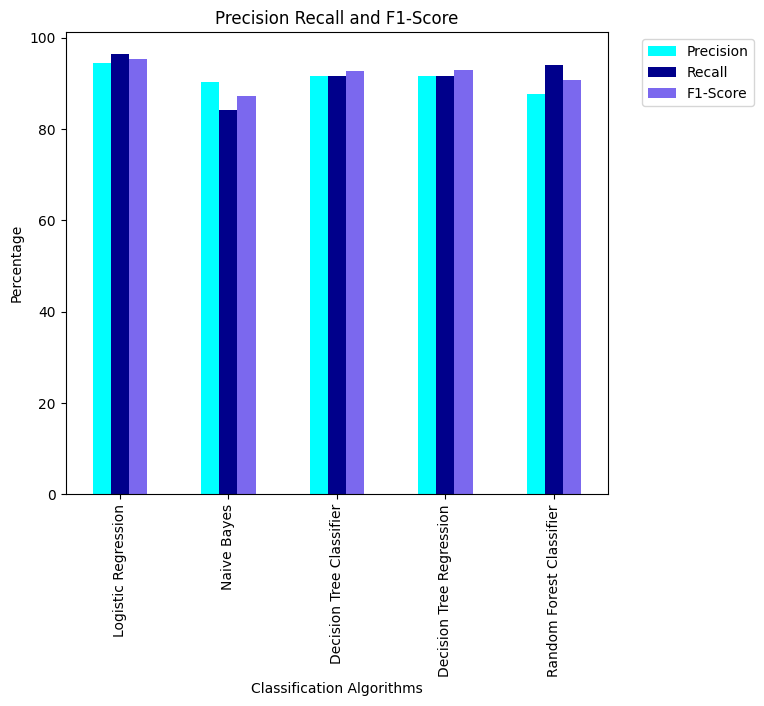

In [ ]:
lrp, lrpr, lrpf = round(precision_score(y_test, X_test_prediction_lr)*100,3), round(recall_score(y_test, X_test_prediction_lr)*100,3), round(f1_score(y_test, X_test_prediction_lr)*100,3)
nbp, nbr, nbf = round(precision_score(y_test, X_test_prediction_nb)*100,3), round(recall_score(y_test, X_test_prediction_nb)*100,3), round(f1_score(y_test, X_test_prediction_nb)*100,3)
dtcp, dtcr, dtcf = round(precision_score(y_test, X_test_prediction_DTC)*100,3), round(recall_score(y_test, X_test_prediction_DTC)*100,3),  round(f1_score(y_test, X_test_prediction_DTC)*100,3)
dtrp, dtrr, dtrf = round(precision_score(y_test, X_test_prediction_DTR)*100,3), round(recall_score(y_test, X_test_prediction_DTR)*100,3), round(f1_score(y_test, X_test_prediction_DTR)*100,3)
rfcp, rfcr, rfcf = round(precision_score(y_test, X_test_prediction_rf)*100,3), round(recall_score(y_test, X_test_prediction_rf)*100,3), round(f1_score(y_test, X_test_prediction_rf)*100,3)

plotdata = pd.DataFrame({
    "Precision":[lrp, nbp, dtrp, dtcp, rfcp],
    "Recall":[lrpr, nbr, dtrp, dtcp, rfcr],
    "F1-Score":[lrpf, nbf, dtrf, dtcf, rfcf]},
    index=["Logistic Regression", "Naive Bayes", "Decision Tree Classifier", "Decision Tree Regression", "Random Forest Classifier"])

plotdata.plot(kind="bar",figsize=(7, 6), color=['cyan', 'darkblue', 'mediumslateblue'])
plt.title("Precision Recall and F1-Score")
plt.xlabel("Classification Algorithms")
plt.ylabel("Percentage")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

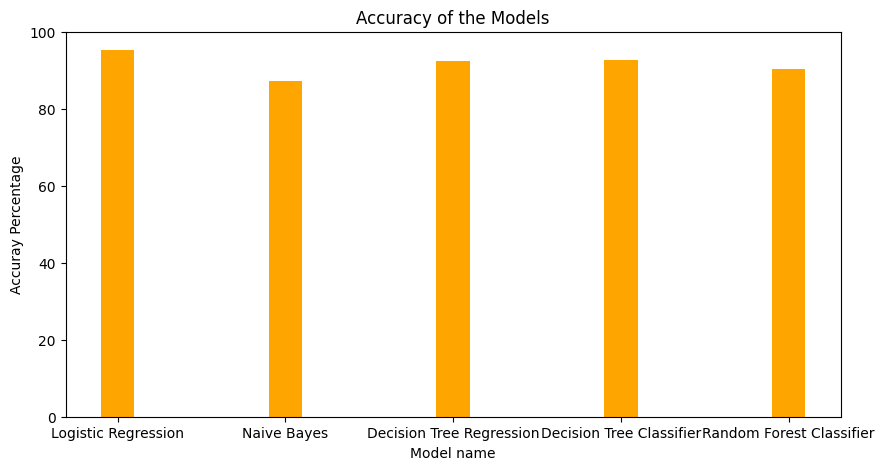

In [ ]:
lra = round(metrics.accuracy_score(y_test, X_test_prediction_lr)*100,2)
nba = round(metrics.accuracy_score(y_test, X_test_prediction_nb)*100,2)
dtra = round(metrics.accuracy_score(y_test, X_test_prediction_DTR)*100,2)
dtc = round(metrics.accuracy_score(y_test, X_test_prediction_DTC)*100,2)
rfca = round(metrics.accuracy_score(y_test, X_test_prediction_rf)*100,2)
data = {'Logistic Regression':lra, 'Naive Bayes':nba, 'Decision Tree Regression':dtra,'Decision Tree Classifier':dtc, 'Random Forest Classifier':rfca}
models = list(data.keys())
accuracy = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(models, accuracy, color ='orange', width = 0.2)

plt.xlabel("Model name")
plt.ylabel("Accuray Percentage")
plt.title("Accuracy of the Models")
plt.show()


In [ ]:
def labeling(lb):
	if lb == 0:
		return 'Fake News'
	elif lb == 1:
		return 'Real News'

def predicting(testing):
  textv = {'The news':[testing]}
  dftest = pd.DataFrame(textv)
  dftest['The news'] = dftest['The news'].apply(wordPreprocessing)
  vect = vectorizer.transform(dftest['The news'])
  pred_LR = LR.predict(vect)
  pred_NB = nb_classifier.predict(vect)
  pred_DTR = DTR.predict(vect)
  pred_DTC = DTC.predict(vect)
  pred_rfc = rf.predict(vect)

  return print("\n\nLogistic Regression Prediction: {} \nNaive Bayes Prediction: {} \nDecision Tree Regression Prediction: {} \nDecision Tree Classifier Prediction: {} \nRandom Forest Classifier Prediction: {}".format(labeling(pred_LR[0]), labeling(pred_NB[0]), labeling(pred_DTR[0]), labeling(pred_DTC[0]), labeling(pred_rfc[0])))


testing = str(input())
predicting(testing)


Russia s Defense Ministry is investigating whether they have killed possibly the world s most wanted man, ISIS leader Abu Bakr al-Baghdadi, among 330 other fighters in an airstrike on May 28. Al-Baghdadi s death has yet to be verified and this also isn t the first time the claim of his demise has been made.The claim comes after the Ministry said that their airstrike targeted an IS military council meeting in the group s de-facto capital of Raqqa in northern Syria. The Russian state-funded Sputnik news agency first made the claim of the possibility of al-Baghdadi s death when they published a statement by Russia s defense ministry that said he may have been present when the airstrike took out 30 IS commanders and up to 300 soldiers at the Raqqa meeting. The leaders at the meeting were discussing their exit through the  Southern Corridor,  the location of the meeting being confirmed by drone footage according to the Ministry According to information that is checked through various channe